## Preprocessing

From binary files to uniform and same sized .input files.

In [2]:
import pandas as pd
import numpy as np
import sys

In [6]:
df = pd.read_csv('parser/parser_dataset.csv')

In [7]:
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      2903 non-null   object
 1   Code      2903 non-null   object
 2   Category  2903 non-null   object
dtypes: object(3)
memory usage: 68.2+ KB
None


In [4]:
max_character_encoding = 130 # it should be 126, but maybe there are characters that I didn't see in the training se

def convert_str_to_array(text):
    content_numbers = np.zeros(len(text))
    for i in range(len(text)):
            # print(ord(str_text[i]) / max_character_encoding)
            content_numbers[i] = ord(text[i]) / max_character_encoding
    return content_numbers

def concatenate(x):
    x['Code'] = x['Name'] + '\n' + x['Code']
    return x

def remove_spaces(x):
    return "".join(x.split())

def squaring(x, max_len):
    import math
    
    height = int( math.sqrt( int(  max_len / 3 ) ) )
    width = height
    total_size = height * width * 3

    return np.pad(x, (0, total_size - len(x)), 'constant')

def substitute_var_name(x):
    VAR_NAME = "$VAR$"
    
    name = x['Name']
    code = x['Code']
    
    idx = code.find(name)
    
    while idx != -1 :
        prevIdx = idx - 1
        postIdx = idx + len(name)
        if (prevIdx == -1 or not code[prevIdx].isalnum()) and (postIdx >= len(code) or not code[postIdx].isalnum()):
            code = code[:idx] + VAR_NAME + code[postIdx:]        
        idx = code.find(name, idx + 1)
        
    x['Code'] = code
    return x

In [5]:
# df = df.apply(concatenate, axis = 1)
# print(df['Code'][0])

In [6]:
df = df.apply(substitute_var_name, axis = 1)
print(df['Code'][0])

{
        ArrayList<Room> hotelRooms = new ArrayList<>();
        for (int $VAR$ = 0; $VAR$ < 15; $VAR$++) {
            hotelRooms.add(new HostelRoom(new StandardRoom($VAR$ + 1, 2, RoomType.ECONOMY)));
        }
        for (int $VAR$ = 0; $VAR$ < 15; $VAR$++) {
            hotelRooms.add(new ExpandableRoom(new StandardRoom($VAR$ + 16, 3, RoomType.LUX)));
        }
        Hotel hotel = new Hotel(hotelRooms);
        RoomManager roomManager = new RoomManager();
        StaffManager staffManager = new StaffManager();
        Human client1 = new Human("Kopeikina", "Anna");
        Human client2 = new Human("Tyulebaeva", "Karina");
        Human client3 = new Human("Domrachev", "Ivan");

        Human slave1 = new Human("Alentev", "Igor");

        Human slave2 = new Human("Asatullaev", "Maruf");

        staffManager.hireStaff(hotel, new PlumberCreator().createStaff(slave1, StaffType.IRREGULAR));
        staffManager.hireStaff(hotel, new SecurityGuardCreator().createStaff(slave2, StaffT

In [7]:
df['Code'] = df['Code'].apply(remove_spaces)
df.head()

,Name,Code,Category
0,i,{ArrayList<Room>hotelRooms=newArrayList<>();fo...,loop_control
1,updatedW,{staff=staff.stream().map(w->{for(Staff$VAR$:u...,iterator
2,deletedW,{staff=staff.stream().filter(w->{for(Staff$VAR...,iterator
3,currentStaff,{staff.addAll(Arrays.stream(createdStaff).filt...,iterator
4,updatedW,{rooms=rooms.stream().map(w->{for(Room$VAR$:up...,iterator


In [8]:
df['Code'] = df['Code'].apply(convert_str_to_array)
df.head()

,Name,Code,Category
0,i,"[0.9461538461538461, 0.5, 0.8769230769230769, ...",loop_control
1,updatedW,"[0.9461538461538461, 0.8846153846153846, 0.892...",iterator
2,deletedW,"[0.9461538461538461, 0.8846153846153846, 0.892...",iterator
3,currentStaff,"[0.9461538461538461, 0.8846153846153846, 0.892...",iterator
4,updatedW,"[0.9461538461538461, 0.8769230769230769, 0.853...",iterator


In [9]:
df['Length'] = df['Code'].apply(len)
df.head()

,Name,Code,Category,Length
0,i,"[0.9461538461538461, 0.5, 0.8769230769230769, ...",loop_control,986
1,updatedW,"[0.9461538461538461, 0.8846153846153846, 0.892...",iterator,213
2,deletedW,"[0.9461538461538461, 0.8846153846153846, 0.892...",iterator,219
3,currentStaff,"[0.9461538461538461, 0.8846153846153846, 0.892...",iterator,233
4,updatedW,"[0.9461538461538461, 0.8769230769230769, 0.853...",iterator,170


In [10]:
maxlen = df['Length'].max() + 100
maxlen

1962

In [11]:
df['SquaredCode'] = df['Code'].apply(squaring, args = (maxlen, ))

In [12]:
df['Y'] = df['Category'].apply(lambda x: int(x == 'iterator'))

In [13]:
X = np.array(df['SquaredCode'].tolist())
Y = df['Y'].to_numpy()[:, np.newaxis]
Y[:5], Y.shape

(array([[0],
        [1],
        [1],
        [1],
        [1]]),
 (748, 1))

## Using Tensorflow to classify the files

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

In [15]:
print(X.shape)
print(Y.shape)

(748, 1875)
(748, 1)


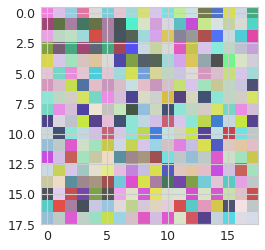

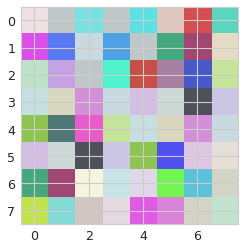

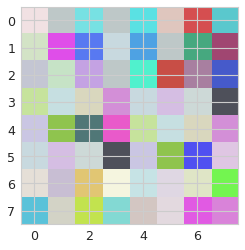

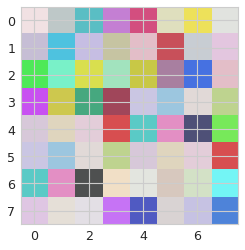

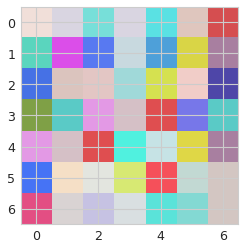

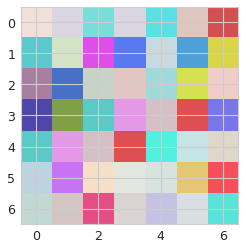

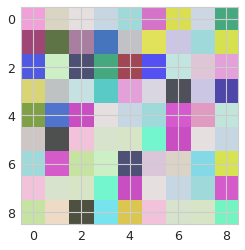

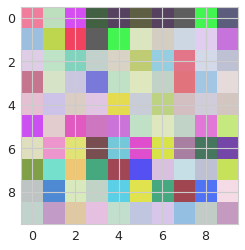

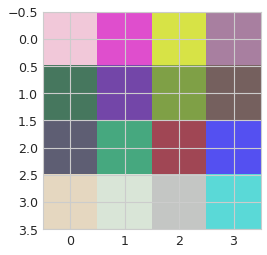

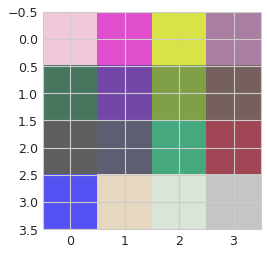

In [16]:
def show_compiled_as_image(index):
    height = int( math.sqrt( int(  len(df['Code'][index]) / 3 ) ) )
    width = height
    total_pixels = height * width * 3

    #print("X[index] = ", len(X[index]))
    #print("total_pixels = ", total_pixels)

    test = X[index,:total_pixels]

    test = np.reshape(test, (height, width, 3))

    plt.imshow(test) #display sample training image
    plt.show()

for i in range(10):
    show_compiled_as_image(i)

Shuffling and breaking in train and test set.

In [17]:
randomize = np.arange(len(df['Name'].tolist()))
np.random.shuffle(randomize)

X_shuffled = X[randomize]
Y_shuffled = Y[randomize]
# names_randomized = np.array(file_names)[randomize]

size_train = 250

X_train = X_shuffled[:size_train]
X_train = np.reshape(X_train, (size_train, 25, 25, 3))

X_test  = X_shuffled[size_train:]
X_test = np.reshape(X_test, (len(df['Name'].tolist())-size_train, 25, 25, 3))

Y_train = Y_shuffled[:size_train]
Y_test  = Y_shuffled[size_train:]

#print(Y_shuffled)
#print(names_randomized)

Creating my model.

In [18]:
def my_model():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            
        ## ZeroPadding2D with padding 3, input shape of height x width x 3
        tfl.ZeroPadding2D(padding=3,input_shape=(25, 25, 3)) ,
        
        ## Conv2D with 32 7x7 filters and stride of 1
        tfl.Conv2D(filters=32, kernel_size=7, strides=1) ,
        
        ## BatchNormalization for axis 3
        tfl.BatchNormalization(axis=3) ,
        
        ## ReLU
        tfl.ReLU(),
        
        ## Max Pooling 2D with default parameters
        tfl.MaxPooling2D(),
        
        ## Flatten layer
        tfl.Flatten(),
        
        ## Dense layer with 1 unit for output & 'sigmoid' activation
        tfl.Dense(units=1, activation='sigmoid')

        ])
    
    return model

Defining the optimizar, loss function and metric.

In [19]:
my_model = my_model()
my_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 31, 31, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 25, 25, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 25, 25, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                        

2022-07-09 23:47:47.741260: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-09 23:47:47.741345: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MiNotebook): /proc/driver/nvidia/version does not exist
2022-07-09 23:47:47.742954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
my_model.fit(X_train, Y_train, epochs=30, batch_size=len(df['Name'].tolist()))

Epoch 1/30
1/1 [==============================] - 1s 570ms/step - loss: 0.7060 - accuracy: 0.8080
Epoch 2/30
1/1 [==============================] - 0s 98ms/step - loss: 0.7325 - accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 97ms/step - loss: 0.4786 - accuracy: 0.8080
Epoch 4/30
1/1 [==============================] - 0s 83ms/step - loss: 0.5138 - accuracy: 0.8080
Epoch 5/30
1/1 [==============================] - 0s 77ms/step - loss: 0.5403 - accuracy: 0.8120
Epoch 6/30
1/1 [==============================] - 0s 82ms/step - loss: 0.5082 - accuracy: 0.8160
Epoch 7/30
1/1 [==============================] - 0s 79ms/step - loss: 0.4629 - accuracy: 0.8200
Epoch 8/30
1/1 [==============================] - 0s 82ms/step - loss: 0.4475 - accuracy: 0.8040
Epoch 9/30
1/1 [==============================] - 0s 79ms/step - loss: 0.4625 - accuracy: 0.7800
Epoch 10/30
1/1 [==============================] - 0s 80ms/step - loss: 0.4570 - accuracy: 0.7680
Epoch 11/30
1/1 [===========

In [21]:
my_model.evaluate(X_test, Y_test)

16/16 [==============================] - 0s 5ms/step - loss: 0.5781 - accuracy: 0.8112


[0.5781221389770508, 0.8112449645996094]